# Causal Inference - Checking Conditions for Causal Inference

In this notebook, we will explore the data XXX

In [17]:
import pandas as pd

In [18]:
data_df = pd.read_csv('/Users/gurkeinan/semester6/Causal-Inference/Project/code/data/processed_data.csv')
data_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Admission grade,Displaced,Educational special needs,Gender,Scholarship holder,Unemployment rate,Inflation rate,GDP,Target,Adult
0,1,17,5,171,1,Complete Secondary Education,122.0,Incomplete Secondary Education,Complete Secondary Education,Administrative,...,127.3,1,0,1,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,Complete Secondary Education,160.0,Complete Secondary Education,Higher Education - Undergraduate,Professionals,...,142.5,1,0,1,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,Complete Secondary Education,122.0,Other Specific Qualifications,Other Specific Qualifications,Plant and Machine Operators,...,124.8,1,0,1,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,Complete Secondary Education,122.0,Other Specific Qualifications,Other Specific Qualifications,Administrative,...,119.6,1,0,0,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,Complete Secondary Education,100.0,Other Specific Qualifications,Other Specific Qualifications,Plant and Machine Operators,...,141.5,0,0,0,0,13.9,-0.3,0.79,Graduate,1


# Stable Unit Treatment Value Assumption (SUTVA)

The SUTVA assumption states that the potential outcomes of each unit are not affected by the treatment assignment of any other unit. This assumption is violated when there is interference between units, i.e., when the treatment of one unit affects the potential outcomes of other units. For example, if a treatment is a vaccine that prevents the spread of a disease, then the treatment of one individual can affect the potential outcomes of other individuals, as one individual's treatment can prevent the disease from spreading to others. In this case, the SUTVA assumption is violated.

Will write in the doc

# Consistency

The Consistency condition states that for a unit that receives treatment $𝑇$, we observe the corresponding potential outcome $𝑌 = 𝑇 𝑌_1 + (1−𝑇) 𝑌_0$.

failure example: treatment is recorded based no noisy, biased self report (“did you use LSD?”).

Explain in the doc.

# Ignorability – no unmeasured confounders

The ignorability assumption states that the treatment assignment is independent of the potential outcomes given the observed covariates - $𝑌_0, 𝑌_1 ⊥ 𝑇 | 𝑋$.

Should be explain in the doc using literatures and examples.

# Common support (overlap)

The common support assumption states that each unit has a non-zero probability of receiving each treatment level - $\forall x \in X, P(T=1|X=x) > 0$ and $P(T=0|X=x) > 0$.

Should mention something about demographic limitations in the regions.

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('preprocessed_data.csv')

# Prepare the feature matrix
X = data.drop(columns=['Adult', 'Target', 'Target new'])
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Unemployment rate,Inflation rate,GDP,Target new.1
0,1,17,5,171,1,Complete Secondary Education,122.0,Incomplete Secondary Education,Complete Secondary Education,Administrative,...,1,0,0,1,1,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,Complete Secondary Education,160.0,Complete Secondary Education,Higher Education - Undergraduate,Professionals,...,1,0,0,0,1,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,Complete Secondary Education,122.0,Other Specific Qualifications,Other Specific Qualifications,Plant and Machine Operators,...,1,0,0,0,1,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,Complete Secondary Education,122.0,Other Specific Qualifications,Other Specific Qualifications,Administrative,...,1,0,0,1,0,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,Complete Secondary Education,100.0,Other Specific Qualifications,Other Specific Qualifications,Plant and Machine Operators,...,0,0,0,1,0,0,13.9,-0.3,0.79,1


In [20]:
# seperate numerical and categorical columns
numerical_columns = ['Previous qualification (grade)', 'Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP']
categorical_columns = list(set(X.columns) - set(numerical_columns))

# Standardize the numerical columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# One-hot encode the categorical columns and remove the original columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

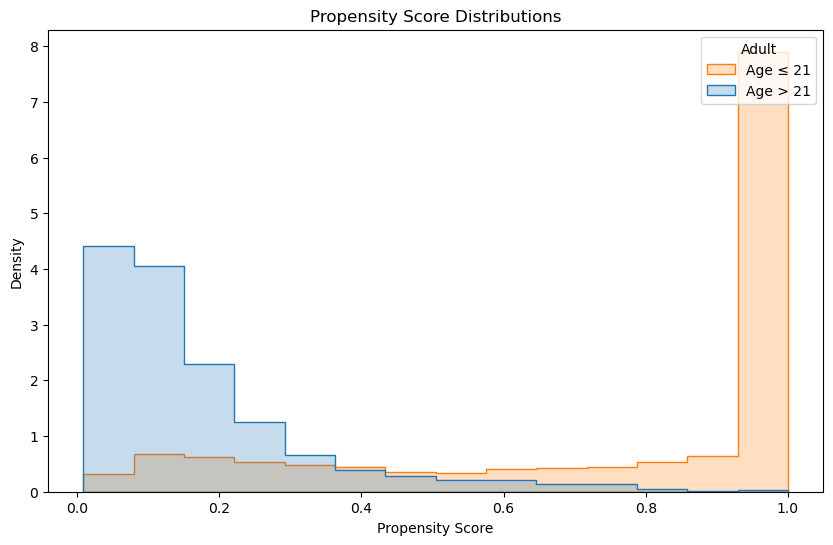

Treated group propensity score range: [0.0209, 1.0000]
Untreated group propensity score range: [0.0090, 0.9891]
The common support condition appears to hold.
Overlap coefficient: 0.9770


/var/folders/17/scnm7xq14yq9ygzbq238tccw0000gn/T/ipykernel_55500/3651582357.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Adult'] == 0]['propensity_score'],
/var/folders/17/scnm7xq14yq9ygzbq238tccw0000gn/T/ipykernel_55500/3651582357.py:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Adult'] == 1]['propensity_score'],


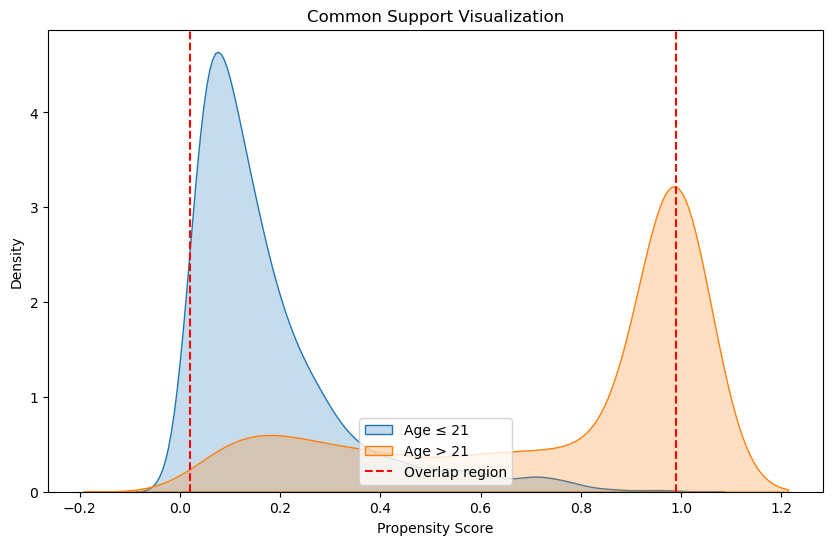

Plots have been saved as 'propensity_score_distribution.png' and 'common_support_visualization.png'


In [21]:
# Estimate propensity scores
propensity_model = LogisticRegression(random_state=42)
propensity_model.fit(X, data['Adult'])
propensity_scores = propensity_model.predict_proba(X)[:, 1]

# Add propensity scores to the dataframe
data['propensity_score'] = propensity_scores

# Visualize propensity score distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='propensity_score', hue='Adult', 
             element='step', stat='density', common_norm=False)
plt.title('Propensity Score Distributions')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend(title='Adult', labels=['Age ≤ 21', 'Age > 21'])
plt.show()

# Check common support
min_treated = data[data['Adult'] == 1]['propensity_score'].min()
max_treated = data[data['Adult'] == 1]['propensity_score'].max()
min_untreated = data[data['Adult'] == 0]['propensity_score'].min()
max_untreated = data[data['Adult'] == 0]['propensity_score'].max()

print(f"Treated group propensity score range: [{min_treated:.4f}, {max_treated:.4f}]")
print(f"Untreated group propensity score range: [{min_untreated:.4f}, {max_untreated:.4f}]")

if min_treated <= max_untreated and min_untreated <= max_treated:
    print("The common support condition appears to hold.")
else:
    print("The common support condition may not hold.")

# Calculate the overlap coefficient
overlap_min = max(min_treated, min_untreated)
overlap_max = min(max_treated, max_untreated)
overlap_coefficient = (overlap_max - overlap_min) / (max_treated - min_untreated)

print(f"Overlap coefficient: {overlap_coefficient:.4f}")

# Visualize common support
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['Adult'] == 0]['propensity_score'], 
            label='Age ≤ 21', shade=True)
sns.kdeplot(data=data[data['Adult'] == 1]['propensity_score'], 
            label='Age > 21', shade=True)
plt.axvline(overlap_min, color='r', linestyle='--', label='Overlap region')
plt.axvline(overlap_max, color='r', linestyle='--')
plt.title('Common Support Visualization')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

print("Plots have been saved as 'propensity_score_distribution.png' and 'common_support_visualization.png'")